# Opis Problemu - Optymalizacja Tras Komunikacji Miejskiej w Krakowie
## Kontekst Decyzyjny
Kraków posiada rozbudowaną sieć komunikacji miejskiej obejmującą autobusy i tramwaje. Codziennie tysiące osób korzysta z transportu publicznego, aby dotrzeć z jednego punktu miasta do drugiego.

Wybór optymalnej trasy - takiej, która wymaga przejechania przez najmniejszą liczbę przystanków - jest kluczowy dla efektywnego planowania podróży.
## Cel
Znalezienie najkrótszej trasy (pod względem liczby przystanków) między wybranymi punktami w sieci komunikacji miejskiej Krakowa, wykorzystując teorię grafów i algorytmy wyszukiwania najkrótszej ścieżki.

## Model Sieci Komunikacyjnej

Sieć komunikacji miejskiej można reprezentować jako graf nieskierowany, gdzie:

    Węzły (wierzchołki) - reprezentują przystanki/stacje komunikacji miejskiej
    Krawędzie - reprezentują bezpośrednie połączenia między przystankami (można przejechać bez przesiadki)

In [1]:
import sys
!{sys.executable} -m pip install networkx
!{sys.executable} -m pip install numpy


[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import networkx as nx
import numpy as np

In [3]:
# Lista przystanków w sieci tramwajowej Krakowa
przystanki = [
    "Dworzec Główny",
    "Teatr Bagatela",
    "Plac Inwalidów",
    "Krowodrza Górka",
    "Bronowice",
    "Salwator",
    "Nowy Kleparz",
    "Politechnika",
    "Rondo Mogilskie",
    "Kampus UJ",
    "Ruczaj",
    "Czerwone Maki"
]

In [4]:
# Lista bezpośrednich połączeń między przystankami
# Każda krotka (A, B) oznacza bezpośrednie połączenie tramwajowe
polaczenia = [
    ("Dworzec Główny", "Teatr Bagatela"),
    ("Dworzec Główny", "Nowy Kleparz"),
    ("Dworzec Główny", "Politechnika"),
    
    ("Teatr Bagatela", "Plac Inwalidów"),
    ("Teatr Bagatela", "Salwator"),
    
    ("Plac Inwalidów", "Krowodrza Górka"),
    ("Plac Inwalidów", "Bronowice"),
    
    ("Krowodrza Górka", "Bronowice"),
    
    ("Salwator", "Nowy Kleparz"),
    
    ("Nowy Kleparz", "Rondo Mogilskie"),
    
    ("Politechnika", "Rondo Mogilskie"),
    ("Politechnika", "Kampus UJ"),
    
    ("Rondo Mogilskie", "Czerwone Maki"),
    
    ("Kampus UJ", "Ruczaj"),
    
    ("Ruczaj", "Czerwone Maki")
]

## Wykorzystanie biblioteki networkx w celu stworzenia grafu

Następnie korzystając z biblioteki nx tworzę graf do którego dodaję kolejne przystanki wraz z połączeniami jako wierzchołki i krawędzie.

{'Dworzec Główny': Text(-0.024885608229353314, -0.0036559489726863226, 'Dworzec Główny'),
 'Teatr Bagatela': Text(0.2038526706885247, -0.3256560449999954, 'Teatr Bagatela'),
 'Plac Inwalidów': Text(0.3334812408941008, -0.7159188790001133, 'Plac Inwalidów'),
 'Krowodrza Górka': Text(0.49885290786398245, -0.9436982186070524, 'Krowodrza Górka'),
 'Bronowice': Text(0.33221712865772535, -1.0, 'Bronowice'),
 'Salwator': Text(0.281209632471165, -0.04889988013001849, 'Salwator'),
 'Nowy Kleparz': Text(0.10823244471430896, 0.21073024984589048, 'Nowy Kleparz'),
 'Politechnika': Text(-0.26872848330948873, 0.2856736707650811, 'Politechnika'),
 'Rondo Mogilskie': Text(-0.10272347078506182, 0.4872366993871173, 'Rondo Mogilskie'),
 'Kampus UJ': Text(-0.5288515940194916, 0.5087011823262017, 'Kampus UJ'),
 'Ruczaj': Text(-0.547679041552543, 0.7796474313699384, 'Ruczaj'),
 'Czerwone Maki': Text(-0.28497782739386973, 0.7658397380156365, 'Czerwone Maki')}

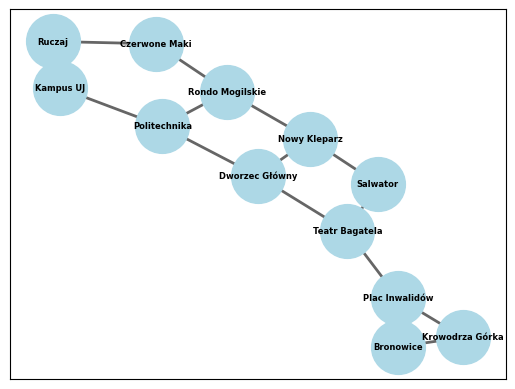

In [5]:
# Tworzenie grafu nieskierowanego
G = nx.Graph()

# Dodanie wszystkich przystanków jako węzły
G.add_nodes_from(przystanki)

# Dodanie wszystkich połączeń jako krawędzie
G.add_edges_from(polaczenia)

pos = nx.spring_layout(G, seed=4)
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=1500)
nx.draw_networkx_edges(G, pos, width=2, alpha=0.6)
nx.draw_networkx_labels(G, pos, font_size=6, font_weight='bold')

In [6]:
# Liczba przystanków (wierzchołków)
liczba_przystankow = G.number_of_nodes()
print(f"Liczba przystanków: {liczba_przystankow}")

# Liczba połączeń (krawędzi)
liczba_polaczen = G.number_of_edges()
print(f"Liczba połączeń: {liczba_polaczen}")

# Czy graf jest spójny (można dojechać z każdego przystanku do każdego)
czy_spojny = nx.is_connected(G)
print(f"Czy sieć jest spójna: {czy_spojny}")

Liczba przystanków: 12
Liczba połączeń: 15
Czy sieć jest spójna: True


In [7]:
# Słownik: przystanek -> liczba połączeń
stopnie_wezlow = dict(G.degree())
print("\nLiczba połączeń dla każdego przystanku:")
for przystanek, stopien in sorted(stopnie_wezlow.items(), key=lambda x: x[1], reverse=True):
    print(f"  {przystanek}: {stopien} połączenia")


Liczba połączeń dla każdego przystanku:
  Dworzec Główny: 3 połączenia
  Teatr Bagatela: 3 połączenia
  Plac Inwalidów: 3 połączenia
  Nowy Kleparz: 3 połączenia
  Politechnika: 3 połączenia
  Rondo Mogilskie: 3 połączenia
  Krowodrza Górka: 2 połączenia
  Bronowice: 2 połączenia
  Salwator: 2 połączenia
  Kampus UJ: 2 połączenia
  Ruczaj: 2 połączenia
  Czerwone Maki: 2 połączenia


## Przykład - wyszukanie najkrótszej trasy

Chcę znaleźć najkrótszą trasę startując z przystanku Bronowice i zmierzając na Ruczaj.


Najkrótsza trasa z Bronowice do Ruczaj:
  Przystanki: Bronowice -> Plac Inwalidów -> Teatr Bagatela -> Dworzec Główny -> Politechnika -> Kampus UJ -> Ruczaj
  Liczba przystanków po drodze: 6


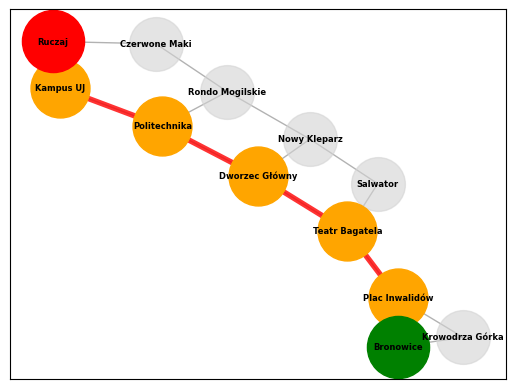

In [8]:
# Wizualizacja z wyróżnioną najkrótszą trasą
start = "Bronowice"
cel = "Ruczaj"

# Najkrótsza ścieżka (lista przystanków)
najkrotsza_sciezka = nx.shortest_path(G, source=start, target=cel)

# Długość najkrótszej ścieżki (liczba przystanków - 1)
dlugosc_sciezki = nx.shortest_path_length(G, source=start, target=cel)

print(f"\nNajkrótsza trasa z {start} do {cel}:")
print(f"  Przystanki: {' -> '.join(najkrotsza_sciezka)}")
print(f"  Liczba przystanków po drodze: {dlugosc_sciezki}")

najkrotsza_sciezka = nx.shortest_path(G, source=start, target=cel)

pos = nx.spring_layout(G, seed=4)

nx.draw_networkx_nodes(G, pos, node_color='lightgray', node_size=1500, alpha=0.6)

sciezka_nodes = najkrotsza_sciezka
nx.draw_networkx_nodes(G, pos, nodelist=sciezka_nodes, 
                        node_color='orange', node_size=1800)

nx.draw_networkx_nodes(G, pos, nodelist=[start], 
                        node_color='green', node_size=2000)
nx.draw_networkx_nodes(G, pos, nodelist=[cel], 
                        node_color='red', node_size=2000)

nx.draw_networkx_edges(G, pos, width=1, alpha=0.3)
nx.draw_networkx_labels(G, pos, font_size=6, font_weight='bold')

sciezka_edges = [(najkrotsza_sciezka[i], najkrotsza_sciezka[i+1]) 
                 for i in range(len(najkrotsza_sciezka)-1)]
nx.draw_networkx_edges(G, pos, edgelist=sciezka_edges, 
                        width=4, edge_color='red', alpha=0.8)

## Najważniejsze przystanki

In [9]:
centralnosc = nx.betweenness_centrality(G)
print("\nCentralność przystanków (najważniejsze węzły komunikacyjne):")
for przystanek, wartosc in sorted(centralnosc.items(), key=lambda x: x[1], reverse=True)[:5]:
    print(f"  {przystanek}: {wartosc:.3f}")


Centralność przystanków (najważniejsze węzły komunikacyjne):
  Teatr Bagatela: 0.458
  Dworzec Główny: 0.394
  Plac Inwalidów: 0.327
  Politechnika: 0.303
  Rondo Mogilskie: 0.212


## Przystanki (wierzchołki) i połączenia (mosty) rozspajające graf

{'Dworzec Główny': Text(-0.024885608229353314, -0.0036559489726863226, 'Dworzec Główny'),
 'Teatr Bagatela': Text(0.2038526706885247, -0.3256560449999954, 'Teatr Bagatela'),
 'Plac Inwalidów': Text(0.3334812408941008, -0.7159188790001133, 'Plac Inwalidów'),
 'Krowodrza Górka': Text(0.49885290786398245, -0.9436982186070524, 'Krowodrza Górka'),
 'Bronowice': Text(0.33221712865772535, -1.0, 'Bronowice'),
 'Salwator': Text(0.281209632471165, -0.04889988013001849, 'Salwator'),
 'Nowy Kleparz': Text(0.10823244471430896, 0.21073024984589048, 'Nowy Kleparz'),
 'Politechnika': Text(-0.26872848330948873, 0.2856736707650811, 'Politechnika'),
 'Rondo Mogilskie': Text(-0.10272347078506182, 0.4872366993871173, 'Rondo Mogilskie'),
 'Kampus UJ': Text(-0.5288515940194916, 0.5087011823262017, 'Kampus UJ'),
 'Ruczaj': Text(-0.547679041552543, 0.7796474313699384, 'Ruczaj'),
 'Czerwone Maki': Text(-0.28497782739386973, 0.7658397380156365, 'Czerwone Maki')}

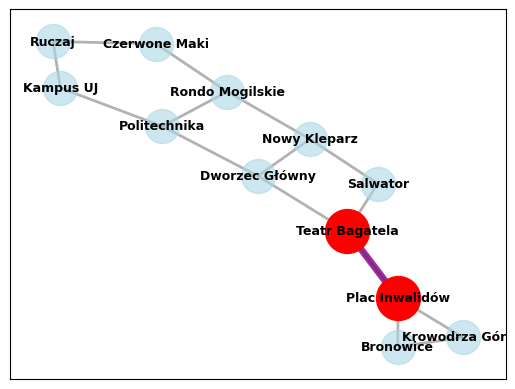

In [10]:
pos = nx.spring_layout(G, seed=4)

punkty_art = list(nx.articulation_points(G))
mosty = list(nx.bridges(G))

nx.draw_networkx_nodes(G, pos, node_color='lightblue', 
                        node_size=600, alpha=0.6)

if punkty_art:
    nx.draw_networkx_nodes(G, pos, nodelist=punkty_art, 
                            node_color='red', node_size=1000, 
                            label='Punkty artykulacji')

nx.draw_networkx_edges(G, pos, width=2, alpha=0.3)

if mosty:
    nx.draw_networkx_edges(G, pos, edgelist=mosty, 
                            width=5, edge_color='purple', 
                            alpha=0.8, label='Mosty')

nx.draw_networkx_labels(G, pos, font_size=9, font_weight='bold')